# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
fraud_df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [10]:
for column in fraud_df.columns:
    print("\nColumn:", column)
    print(fraud_df[column].value_counts())
    print("Number of unique values:", len(fraud_df[column].unique()))
    print("-" * 50)


Column: distance_from_home
distance_from_home
57.877857     1
17.696734     1
47.933214     1
48.300681     1
25.414372     1
             ..
145.704144    1
4.501861      1
17.443799     1
3.583736      1
58.108125     1
Name: count, Length: 1000000, dtype: int64
Number of unique values: 1000000
--------------------------------------------------

Column: distance_from_last_transaction
distance_from_last_transaction
0.311140    1
3.640681    1
3.095558    1
3.273022    1
0.245656    1
           ..
3.680817    1
0.367765    1
0.841772    1
3.321236    1
0.318110    1
Name: count, Length: 1000000, dtype: int64
Number of unique values: 1000000
--------------------------------------------------

Column: ratio_to_median_purchase_price
ratio_to_median_purchase_price
1.945940    1
1.161855    1
0.607566    1
1.257822    1
1.846399    1
           ..
0.612613    1
0.491743    1
1.380752    1
0.967628    1
0.386920    1
Name: count, Length: 1000000, dtype: int64
Number of unique values: 10000

**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

Value counts of fraud:
fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

Percentage distribution:
fraud
0.0    91.2597
1.0     8.7403
Name: proportion, dtype: float64


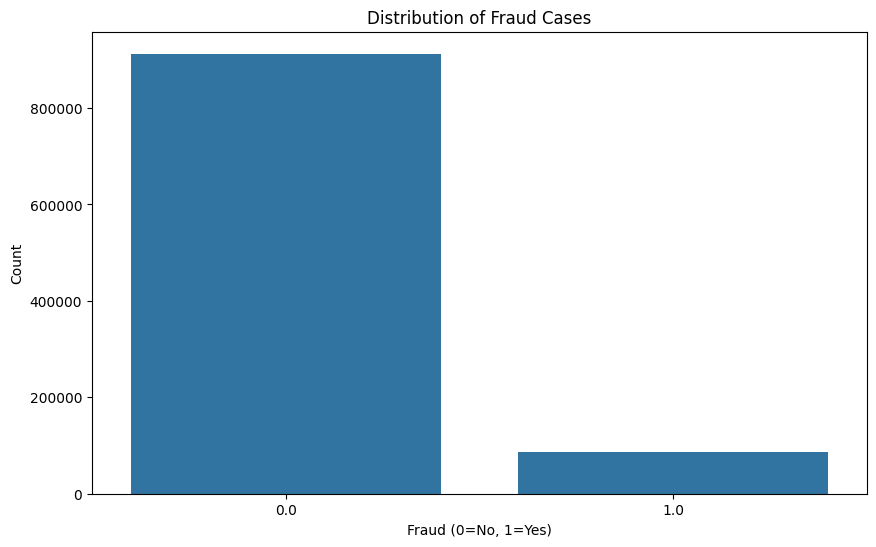

In [12]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Check raw counts and percentages
print("Value counts of fraud:")
print(fraud_df['fraud'].value_counts())
print("\nPercentage distribution:")
print(fraud_df['fraud'].value_counts(normalize=True) * 100)

# Visualize distribution
plt.figure(figsize=(10,6))
sns.countplot(data=fraud_df, x='fraud')
plt.title('Distribution of Fraud Cases')
plt.xlabel('Fraud (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

### Step 1 Insight
- Total transactions: 1,000,000
- Legitimate transactions (0): 912,597 (91.26%)
- Fraudulent transactions (1): 87,403 (8.74%)
- Ratio approximately 10.4:1
- **Conclusion**: This is an imbalanced dataset since the ratio between classes is greater than 1:10

- **2.** Train a LogisticRegression.

In [13]:
# Split features and target
X = fraud_df.drop('fraud', axis=1)
y = fraud_df['fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

c:\Users\usuar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

### Understanding the Warning and Scaling

#### 0. Warning Analysis
- **Root Cause**: LogisticRegression's optimizer (lbfgs) didn't converge
- **Meaning**: Algorithm didn't find optimal coefficients within default iterations (100)

#### 1. Initial Data Analysis
- **Features with Large Ranges:**
  - `distance_from_home`: 0.004 to 8777.13
  - `distance_from_last_transaction`: 0.0001 to 11851.10
  - `ratio_to_median_purchase_price`: 0.004 to 266.69

- **Binary Features (0-1):**
  - `repeat_retailer`
  - `used_chip`
  - `used_pin_number`
  - `online_order`

#### 2. Why Scale?
- **Convergence Warning**
  - LBFGS optimizer failed to converge
  - Large feature ranges slow down optimization
  - Default 100 iterations insufficient

- **Model Impact**
  - Larger values could dominate smaller ones
  - Binary features would have minimal influence
  - Risk of numerical instability

#### 3. StandardScaler Benefits
- **Mathematical Transform:** 
  - z = (x - μ) / σ
  - Results in mean=0, std=1
  - All features contribute equally

- **Optimization Improvements:**
  - Faster convergence
  - Better numerical stability
  - Equal feature importance
  - More reliable coefficients

In [15]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain with scaled data and increased iterations
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [18]:
# Before scaling: Check feature ranges
print("Before scaling:")
print(X_train.describe())

# After scaling: Check feature ranges
print("\nAfter scaling:")
print(pd.DataFrame(X_train_scaled).describe())

Before scaling:
       distance_from_home  distance_from_last_transaction  \
count       800000.000000                   800000.000000   
mean            26.619659                        5.026863   
std             65.213843                       26.375663   
min              0.004874                        0.000118   
25%              3.880890                        0.296727   
50%              9.964660                        0.998402   
75%             25.742404                        3.358554   
max           8777.136420                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer      used_chip  \
count                   800000.000000    800000.000000  800000.000000   
mean                         1.825205         0.881516       0.350356   
std                          2.794690         0.323180       0.477082   
min                          0.004399         0.000000       0.000000   
25%                          0.475573         1.000000       0.000000

- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



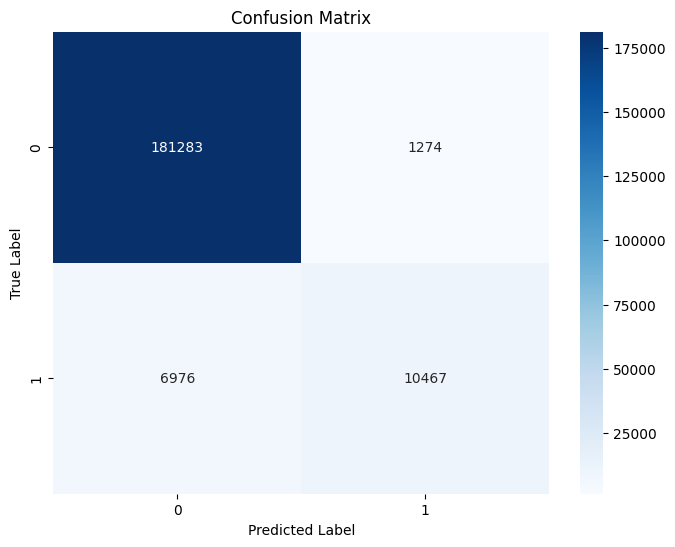

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Analysis of Classification Report for Credit Card Fraud Detection

## Classification Report:
This report provides detailed metrics for the model's performance:

- **Precision**: It tells us how many of the instances predicted as positive (label "1") were actually positive. 
  - For class "0" (negative), it is **0.96**, and for class "1" (positive), it is **0.89**.
  
- **Recall**: It measures how many actual positives (label "1") were correctly identified. 
  - For class "0", recall is **0.99**, which indicates very few false negatives. However, for class "1", recall is **0.60**, showing the model struggles with identifying positive cases (lots of false negatives).

- **F1-Score**: This is the harmonic mean of precision and recall. It balances both metrics, providing a single value that reflects the overall performance. 
  - The F1-Score for class "0" is **0.98** (good) and for class "1" is **0.72** (moderate), indicating an imbalanced performance.

- **Support**: It is the number of actual occurrences of each class in the dataset. 
  - Class "0" has **182,557** occurrences, and class "1" has **17,443** occurrences.

## Confusion Matrix:
The confusion matrix visualizes the actual versus predicted values:

- **True Positives (TP)**: This is the number of correct predictions for the positive class (class "1"). 
  - In the matrix, **10,467** instances were correctly predicted as positive.

- **False Positives (FP)**: This is the number of negative instances incorrectly predicted as positive. 
  - Here, **1,274** instances are false positives (class "0" predicted as "1").

- **True Negatives (TN)**: This is the number of correct predictions for the negative class (class "0"). 
  - Here, **181,283** instances were correctly predicted as negative.

- **False Negatives (FN)**: This is the number of positive instances incorrectly predicted as negative. 
  - The model incorrectly predicted **6,976** positive cases as negative.

## Overall Analysis:
- The model does well at predicting the negative class (class "0") with high precision, recall, and F1-score.
- It performs less well on the positive class (class "1"), with a relatively low recall of **0.60**, indicating a significant number of positive instances are being missed (false negatives).
- The model’s performance is quite skewed towards class "0", possibly due to imbalanced classes, with far more instances of class "0" than class "1".
  
This suggests that while the model is reliable for negative predictions, improvements are needed to better identify positive cases. Balancing the dataset or using techniques like oversampling/undersampling or adjusting thresholds could help improve the recall for class "1".

#### Key Insights:
- **Class Imbalance Impact**: Model performs better on majority class (legitimate transactions)
- **Critical Miss**: 40% of fraudulent transactions are missed (1 - recall for class 1)
- **False Positives**: When model predicts fraud, it's right 89% of the time
- **Business Impact**: Model misses too many frauds (poor recall on class 1), though it's precise when it does flag fraud

#### Recommendation:
Need to improve recall for fraudulent transactions while maintaining precision.

- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 

- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 